In [1]:
import tensorflow as tf
from inline_tensorboard import show_graph
from IPython.display import Image

In [2]:
sess = tf.InteractiveSession()

# Symbolic if-statement

In [3]:
inp = tf.placeholder(tf.int32, shape=tf.TensorShape([]), name="low")

In [4]:
is_even = tf.cond(tf.equal(tf.mod(inp, 2), 0),
                  lambda: tf.constant(1),
                  lambda: tf.constant(0))

In [5]:
print is_even.eval({inp: 1992})
print is_even.eval({inp: 1999})

1
0


# Symbolic while-loop

Let's assume we have to buld a graph that sums all numbers from a lower limit to a higher limit.

In [6]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [7]:
lo = tf.placeholder(tf.int32, shape=tf.TensorShape([]), name="low")
hi = tf.placeholder(tf.int32, shape=tf.TensorShape([]), name="high")

In [8]:
def _condition(number, n_sum):
    return tf.less_equal(number, hi)

In [9]:
def _update(number, n_sum):
    n_sum  = n_sum + number
    number = number + 1
    
    return (number, n_sum)

In [10]:
initializations = [lo, tf.zeros(1, dtype=tf.int32)]

In [11]:
result = tf.while_loop(_condition, _update, initializations)
answer = result[1]

In [12]:
show_graph(tf.get_default_graph().as_graph_def())

In [13]:
answer.eval({lo: 1, hi:10})

array([55], dtype=int32)

In [14]:
# Sanity check
10 * 11 / 2

55

# A word on static loops
Sometimes, static loops can be useful (e.g. if the number of iterations is usually small and you know an upper bound).

In [15]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [16]:
lo = tf.placeholder(tf.int32, shape=tf.TensorShape([]), name="low")
hi = tf.placeholder(tf.int32, shape=tf.TensorShape([]), name="high")

In [17]:
maxiter = 50
num_ = tf.identity(lo)
sum_ = tf.identity(lo)

for _ in range(maxiter):
    num_ = num_ + 1
    
    sum_ = tf.cond(tf.less_equal(num_, hi),
                   lambda: sum_ + num_,
                   lambda: sum_)

In [18]:
show_graph(tf.get_default_graph().as_graph_def())

In [19]:
sum_.eval({lo: 1, hi:10})

55

# In Practice

* Dynamic loops are (slightly counterintuitively) almost always faster
* Instead of using `tf.cond`, use `tf.where` to operate on batches.
* **Watch out:** `tf.cond` takes `python functions` as arguments, whereas `tf.where` takes batch-shaped Tensors.

# Debugging
Debugging can get painful for very nested dynamic graphs. Print statements are your best friend!

In [20]:
def _condition(number, n_sum):
    return tf.less_equal(number, hi)

In [21]:
def _update(number, n_sum):
    n_sum  = n_sum + number
    number = tf.Print(number, [number], 'The current value is:')
    number = number + 1
    
    return (number, n_sum)

In [22]:
initializations = [lo, tf.zeros(1, dtype=tf.int32)]

In [23]:
result = tf.while_loop(_condition, _update, initializations)
answer = result[1]

In [24]:
answer.eval({lo: 1, hi:10})

array([55], dtype=int32)

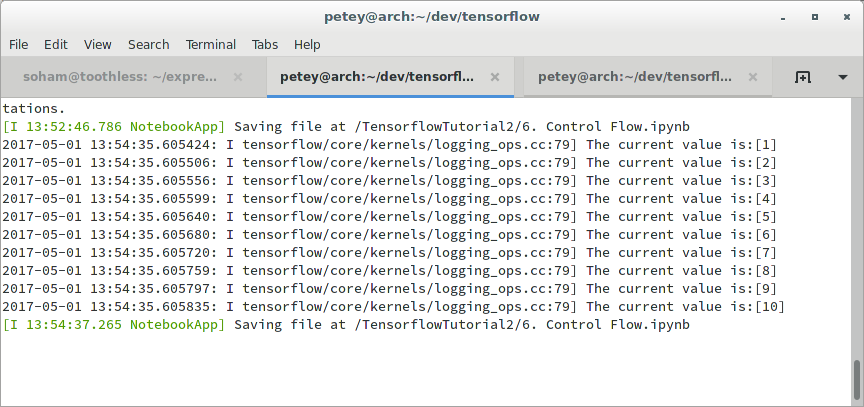

In [25]:
Image("./images/Outputs.png")